# **Example 03**
In this example, we will construct a **convolutional neural network** to improve our recogniztion of handwritten digits.

First, we import the `TensorFlow` and `numpy` libraries.

In [ ]:
import tensorflow as tf
import numpy as np

Next, we load the MNIST dataset. Remember that this dataset has images of handwritten digits (from 0 to 9) and is divided into a training set and a test set.

In [ ]:
data = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = data.load_data()

11501568/11490434 [==============================] - 0s 0us/step


The input of the convolutional neural network must be a 4D array, so the first step is to **reshape** the data. If we don't do this, we will get an error when training the neural network. We also normalize the data, as we did in the previous example.

In [ ]:
print(x_train.shape)
print(x_test.shape)
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

(60000, 28, 28)
(10000, 28, 28)


Next, we design our convolutional neural network.

First, we have a **convolutional** layer. We specify the number of convolutions (e.g., `32`), the size of the convolution (e.g., `3x3`), the activation function (e.g., `relu`), and the shape of the input data.

We follow this with a **pooling** layer. This layer reduces the size of the image, while maintaining the content of the features highlighted by the convolution. We specify the type of pooling (e.g., max pooling) and the size of the pooling window (e.g., `2x2`). 

We then have a Flatten layer and a sequence of Dense layers, like in the previous example.

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # convolutional layer
  tf.keras.layers.MaxPooling2D(2, 2), # pooling layer
  tf.keras.layers.Flatten(), # flatten layer
  tf.keras.layers.Dense(64, activation='relu'), # dense layer
  tf.keras.layers.Dense(10, activation='softmax') # output layer
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 64)                346176    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 347,146
Trainable params: 347,146
Non-trainable params: 0
__________________________________________________

We compile our convolutional neural network by specifying the loss function, the optimization algorithm, and the evaluation metric.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

We then train our convolutional neural network to fit the data. Notice that it will take longer to train, since it's more complex.

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1660 - accuracy: 0.9507
Epoch 2/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0598 - accuracy: 0.9816
Epoch 3/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0401 - accuracy: 0.9875
Epoch 4/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0302 - accuracy: 0.9910
Epoch 5/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0218 - accuracy: 0.9930


Finally, we evaluate the performance of our convolutional neural network on the test set.

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0383 - accuracy: 0.9870


[0.03833775594830513, 0.9869999885559082]

The accuracy should now be around 99% on the training set and around 98% on the test set, so there is an improvement after adding the convolutions. **You can try to improve the accuracy further by adding more layers, neurons, or epochs, but be careful not to overfit the model!**

Finally, we can understand convolutions better by visualizing the result of running the convolutions and pooling on each image. Notice that the convolutions are highlighting specific features in the images. **Try changing the value of `i` and `j` to visualize the result of other convolutions in other images.**

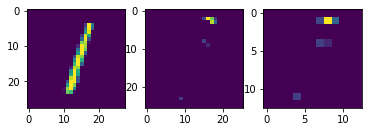

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import models
i = 4 # convolution number (1 to 32)
j = 2 # image number
f, arr = plt.subplots(1, 3)
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
arr[0].imshow(x_test[j].reshape(28, 28)) # visualize original image
arr[0].grid(False)
for x in range(1, 3):
  f = activation_model.predict(x_test[j].reshape(1, 28, 28, 1))[x-1] # visualize convolutions/pooling
  arr[x].imshow(f[0, : , :, i])
  arr[x].grid(False)